In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [90]:
# 1. Load the dataset and explore the variables.

data = pd.read_csv('customer_churn.csv')
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
# First let's put all column names in lower cases
data.columns = list(map(lambda x: x.lower(), data.columns))

In [92]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [93]:
data.churn.value_counts() #imbalanced

No     5174
Yes    1869
Name: churn, dtype: int64

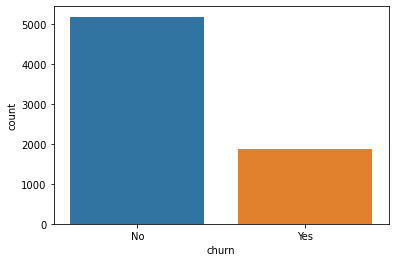

In [105]:
sns.countplot(x='churn', data=data);
plt.show()

In [106]:
# The value we want to predict has Yes or No values. Let's replace Yes by 1 and No by 0
data['churn'] = data['churn'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
data['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [66]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [67]:
data['seniorcitizen'].value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [68]:
data['multiplelines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

In [69]:
data['internetservice'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

In [70]:
data['onlinebackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64

In [71]:
data['deviceprotection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64

In [72]:
data['techsupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: techsupport, dtype: int64

In [73]:
data['contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

In [74]:
data['paperlessbilling'].value_counts()

Yes    4171
No     2872
Name: paperlessbilling, dtype: int64

In [75]:
data['paymentmethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: paymentmethod, dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [108]:
data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [78]:
# 2. We will try to predict variable Churn using a logistic regression 
# on variables tenure, SeniorCitizen,MonthlyCharges.

# Colinearity analysis

In [113]:
# X/y split
df_lr = data[['seniorcitizen', 'tenure', 'monthlycharges', 'churn']]
X = data.select_dtypes(np.number).drop('churn', axis = 1)
y = data['churn']
X

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


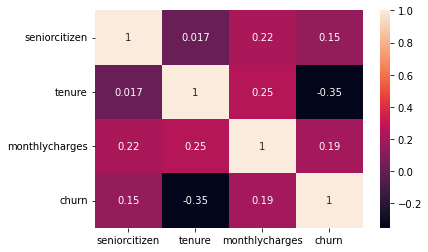

In [114]:
correlations_matrix = df_lr.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [81]:
# there is no significant correlation between numerical variables, so we will keep all of them

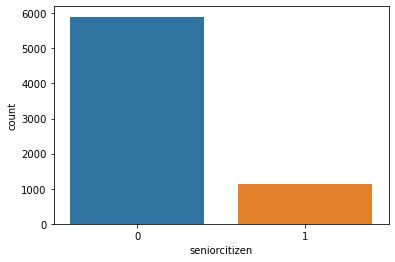

In [82]:
# Let's explore distribution of our variables
sns.countplot(x = data['seniorcitizen'])
plt.show()

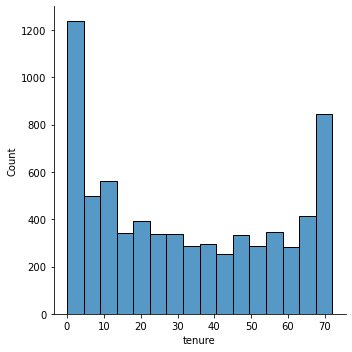

In [83]:
sns.displot(x = data['tenure'])
plt.show()

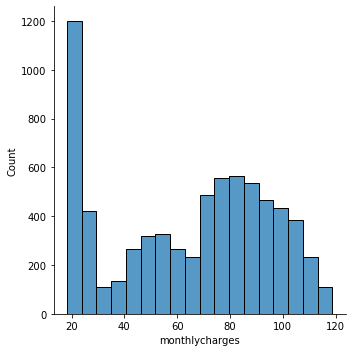

In [84]:
sns.displot(x = data['monthlycharges'])
plt.show()

# Scaling of independant variables

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [123]:
y_train.isna().sum()

0

In [ ]:
# all targeted variables are numerical so no need to split between categorical and numerical

# I choose to apply the standardscaler transformation because
# none of the variables follows a normal distribution

In [124]:
transformer = StandardScaler()
transformer.fit(X_train)  
X_train_scaled_np = transformer.transform(X_train) 
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index = X_train.index)

# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns, index = X_test.index)  

X_train_scaled.head()

,seniorcitizen,tenure,monthlycharges
597,-0.441308,-1.150536,0.029610
5747,-0.441308,-0.008594,0.269748
5966,-0.441308,0.399243,1.152462
3107,-0.441308,1.622752,1.622801
2670,-0.441308,0.766296,1.010036


In [125]:
y_train.head()

597     0
5747    0
5966    1
3107    0
2670    0
Name: churn, dtype: int64

# Logistic Regression 

In [126]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression(random_state=4, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=4)

In [140]:
# now let's try to predict our probability
lr.predict_proba(X_train_scaled)

array([[0.48913287, 0.51086713],
       [0.78465858, 0.21534142],
       [0.72414875, 0.27585125],
       ...,
       [0.77818959, 0.22181041],
       [0.95441891, 0.04558109],
       [0.91441371, 0.08558629]])

In [141]:
lr.predict_proba(X_train_scaled).shape

(5282, 2)

In [142]:
# What are the predictions for each row ?
lr.predict(X_train_scaled)

array([1, 0, 0, ..., 0, 0, 0])

In [143]:
# now let's compute log(p/(1-p)) :
logit = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

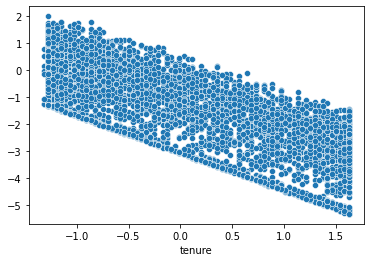

In [144]:
# let's analyze our linear relationship here
sns.scatterplot(y = logit,x = X_train_scaled['tenure']);
plt.show()

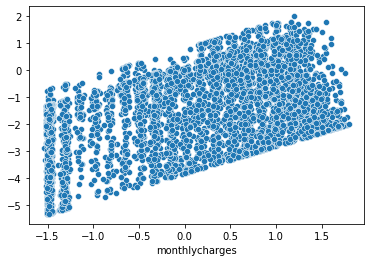

In [145]:
sns.scatterplot(y = logit,x = X_train_scaled['monthlycharges']);
plt.show()

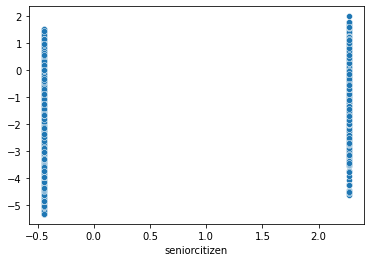

In [146]:
sns.scatterplot(y = logit,x = X_train_scaled['seniorcitizen']);
plt.show()

In [ ]:
# no linear relationship with seniorcitizen : should we take it out of the model ?

# Evaluation of our model

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.43
The F1 in the TEST set is: 0.51
The Kappa in the TEST set is: 0.37


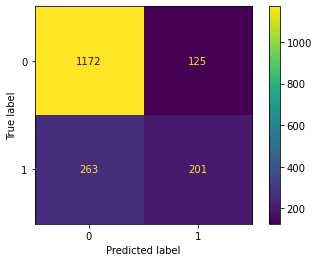

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# the performance is pretty bad...
# the false No are specially annoying because it predicts that a customer stays (churn = no)
# whereas he leaves (churn = yes)
# we have 263 of these values here...

In [ ]:
# Even a simple model will give us more than 70% accuracy. Why?

# Accuracy is the proportion of correct predictions over total predictions.
# so if we have linear relationships between our variables, there is a majority of correct values (the ones around the line)

# moreover with the class imbalance we have (most of customers stays, churn = no)
# the model is urged to predict more No's 

In [ ]:
# Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

# Managing class imbalance with SMOTE

In [150]:
from imblearn.over_sampling import SMOTE

In [155]:
sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [156]:
print(X_train.shape)
print(X_train_SMOTE.shape)
# we reduced the class imbalance

(5282, 3)
(7754, 3)


In [157]:
# now let's build and evaluate again our logistic regression model

In [158]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.70
The F1 in the TEST set is: 0.57


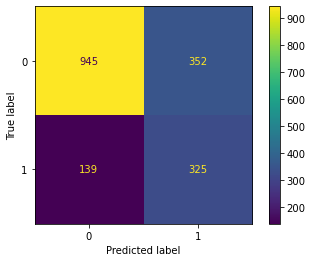

In [159]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# the model is a bit better but still far from perfect :
# we have now 139 "false No's" instead of the 263 of before